In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from smpl_webuser.serialization import load_model
from lib.viz import plot_mattress, plot_skeleton, plot_results
from lib.constants import set_format, constants

In [3]:
set_format('clever')

In [4]:
SAMPLE = 4096

In [5]:
data = pd.read_pickle('synth/general/train_rollpi_plo_f_lay_set18to22_10000.p')

In [6]:
data.keys()

dict_keys(['markers_xyz_m', 'body_shape', 'mesh_contact', 'mesh_depth', 'root_xyz_shift', 'body_height', 'body_mass', 'images', 'joint_angles', 'bed_angle_deg'])

In [7]:
len(data['images'])

10000

<AxesSubplot:>

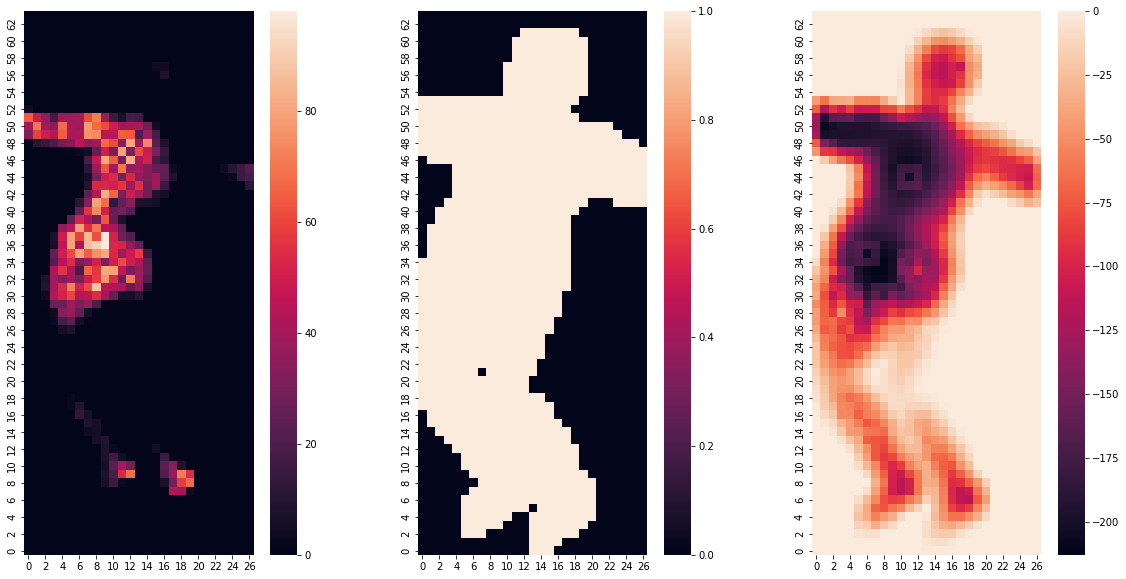

In [8]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(20, 10)
plot_mattress(np.reshape(data['images'][SAMPLE], (constants.SENSORS_Y, constants.SENSORS_X)), ax=ax[0])
plot_mattress(np.reshape(data['mesh_contact'][SAMPLE], (constants.SENSORS_Y, constants.SENSORS_X)), ax=ax[1])
plot_mattress(np.reshape(data['mesh_depth'][SAMPLE], (constants.SENSORS_Y, constants.SENSORS_X)), ax=ax[2])

In [9]:
data['joint_angles'][SAMPLE][72:82]

array([], dtype=float64)

In [10]:
model = load_model('models/basicmodel_F_lbs_10_207_0_v1.0.0.pkl')
model.pose[:] = data['joint_angles'][SAMPLE]
model.betas[:] = data['body_shape'][SAMPLE]
model.J_transformed.shape

(24, 3)

In [11]:
joint_cart_gt = np.array(model.J_transformed).reshape(24, 3)
for s in range(3):
    joint_cart_gt[:, s] += (data['root_xyz_shift'][SAMPLE][s] - float(model.J_transformed[0, s]))

In [12]:
joint_cart_gt = joint_cart_gt / np.asarray([constants.MATTRESS_WIDTH, constants.MATTRESS_HEIGHT, 1])
joint_cart_gt = joint_cart_gt - np.asarray([0.35, 0.15, 0])

<AxesSubplot:>

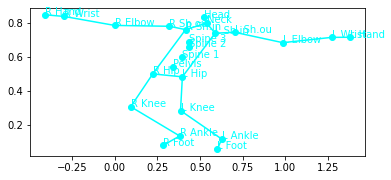

In [13]:
plot_skeleton(joint_cart_gt, scale_up=False)

<AxesSubplot:>

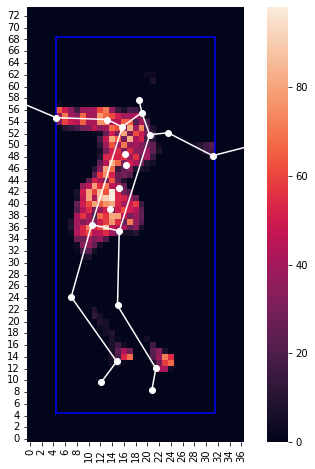

In [14]:
plt.figure(1).set_size_inches(8, 8)
plot_results(np.reshape(data['images'][SAMPLE], (constants.SENSORS_Y, constants.SENSORS_X)), [joint_cart_gt])